# Analysis Notebook

In [188]:
import time
import utils
import requests
from pathlib import Path

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

## 1) Data Sampling and Collection

Please Add short description of process.

In [189]:
# By Ned Antell

def fetch_and_cache(data_url, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.

    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded

    return: The pathlib.Path object representing the file.
    """

    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok = True)
    file_path = data_dir / Path(file)
    # If the file already exists and we want to force a download then
    # delete the file first so that the creation date is correct.
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        resp = requests.get(data_url)
        with file_path.open('wb') as f:
            f.write(resp.content)
        print('Done!')
        last_modified_time = time.ctime(file_path.stat().st_mtime)
    else:
        last_modified_time = time.ctime(file_path.stat().st_mtime)
        print("Using cached version that was downloaded (UTC):", last_modified_time)
    return file_path

def fetch_and_cache_gdrive(gdrive_id, file, data_dir="data", force=False):
    """
    Download and cache a url and return the file object.

    data_url: the web address to download
    file: the file in which to save the results.
    data_dir: (default="data") the location to save the data
    force: if true the file is always re-downloaded

    return: The pathlib.Path object representing the file.
    """

    data_dir = Path(data_dir)
    data_dir.mkdir(exist_ok = True)
    file_path = data_dir / Path(file)
    # If the file already exists and we want to force a download then
    # delete the file first so that the creation date is correct.
    if force and file_path.exists():
        file_path.unlink()
    if force or not file_path.exists():
        print('Downloading...', end=' ')
        download_file_from_google_drive(gdrive_id, file_path)
        print('Done!')
        last_modified_time = time.ctime(file_path.stat().st_mtime)
    else:
        last_modified_time = time.ctime(file_path.stat().st_mtime)
        print("Using cached version that was downloaded (UTC):", last_modified_time)
    return file_path



# https://stackoverflow.com/questions/38511444/python-download-files-from-google-drive-using-url

def download_file_from_google_drive(id, destination):
    URL = "https://docs.google.com/uc?export=download"

    session = requests.Session()

    response = session.get(URL, params = { 'id' : id }, stream = True)
    token = get_confirm_token(response)

    if token:
        params = { 'id' : id, 'confirm' : token }
        response = session.get(URL, params = params, stream = True)

    save_response_content(response, destination)

def get_confirm_token(response):
    for key, value in response.cookies.items():
        if key.startswith('download_warning'):
            return value

    return None

def save_response_content(response, destination):
    CHUNK_SIZE = 32768

    with open(destination, "wb") as f:
        for chunk in response.iter_content(CHUNK_SIZE):
            if chunk: # filter out keep-alive new chunks
                f.write(chunk)

In [190]:
# By Ned Antell
#Pull data from google drive

#bioCON plant diversity
#utils.fetch_and_cache_gdrive('1WIIljYUz3B45K9DOA1M3cfGOedtgxLFL', 'bioCON_plant_diversity.txt', data_dir = '')

#pollinators 1
fetch_and_cache_gdrive('1JCynlMV0Um07MUa3E0qSqdDYOGfy9Eyr', 'plant_pollinator_diversity_set1.csv', data_dir = 'data/')

#pollinators 2
fetch_and_cache_gdrive('1IjzzaYep_BXIzMVjIBmh8AiXbydwmYk_', 'plant_pollinator_diversity_set2.csv', data_dir = 'data/')

Using cached version that was downloaded (UTC): Mon Nov 21 15:00:38 2022
Using cached version that was downloaded (UTC): Mon Nov 21 15:00:39 2022


WindowsPath('data/plant_pollinator_diversity_set2.csv')

In [191]:
file1 = 'data/plant_pollinator_diversity_set1.csv'
file2 = 'data/plant_pollinator_diversity_set2.csv'

In [192]:
df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)
df2.head()

,DBCODE,ENTITY,COMPLEX,MEADOW,PLOT_ID,YEAR,SAMPLEDATE,WATCH,OBSERVER,PLOT,FLW_STATUS,PLTSP_CODE,PLTSP_NAME,NO_STALK,NO_FLWS,QC_NOTES
0,SA026,2,Bunchgrass,BD,BGD01,2011,2011-07-20,1.0,ND,1,NaN,NaN,NaN,NaN,NaN,NaN
1,SA026,2,Bunchgrass,BD,BGD01,2011,2011-07-25,2.0,Andy,1,FLW,ACHIMILL,Achillea millefolium,4.0,36.0,NaN
2,SA026,2,Bunchgrass,BD,BGD01,2011,2011-07-25,2.0,Andy,1,FLW,ERIGFOLI,Erigeron foliosus,14.0,1.0,NaN
3,SA026,2,Bunchgrass,BD,BGD01,2011,2011-07-25,2.0,Andy,1,FLW,VICIAMER,Vicia americana,3.0,2.3,NaN
4,SA026,2,Bunchgrass,BD,BGD01,2011,2011-08-02,3.0,"Andy, Tim",1,FLW,ACHIMILL,Achillea millefolium,2.0,26.0,NaN


In [193]:
df1.head()

,DBCODE,ENTITY,COMPLEX,MEADOW,PLOT_ID,YEAR,SAMPLEDATE,WATCH,OBSERVER,PLOT,...,PPI_STATUS,NO_INT,PLTSP_CODE,PLTSP_NAME,VISSP_CODE,VISSP_NAME,VISSP_TYPE,REF_NO,VISSP_NO,QC_NOTES
0,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ACHIMILL,Achillea millefolium,EPICPUNC,Epicauta puncticollis,predaceous beetle,NaN,1,NaN
1,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,1.0,ACHIMILL,Achillea millefolium,EVYLS5M,Evylaeus sp 5M,halictine bee,NaN,1,NaN
2,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ERIGFOLI,Erigeron foliosus,MUSCGEN3,Muscoid genus 3,herbivorous muscoid fly,NaN,1,NaN
3,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ERIGFOLI,Erigeron foliosus,MUSCGEN3,Muscoid genus 3,herbivorous muscoid fly,NaN,2,NaN
4,SA026,1,Bunchgrass,BD,BGD01,2011,2011-07-24,2.0,NaN,1,...,1,2.0,ERIGFOLI,Erigeron foliosus,TRICORNA,Trichodes ornatus,bee-parasitic beetle,NaN,1,NaN


## 2) Data Cleaning

Please Add short description of process.

In [194]:
# Drop unnecessary/redundant columns for our data analysis

def drop_columns(dataframe, todrop):
    # dataframe: Pandas Dataset to drop columns from
    # todrop: list of columns to drop
    df = dataframe.drop(todrop, axis=1)
    return df

In [195]:
drop_cols_1 = ['DBCODE', 'ENTITY', 'COMPLEX', 'MEADOW', 'START_TIME', 'END_TIME', 'MINUTE', 'OBSERVER', 'PLTSP_NAME', 'VISSP_NAME', 'QC_NOTES']
drop_cols_2 = ['DBCODE', 'ENTITY', 'COMPLEX', 'MEADOW', 'YEAR', 'OBSERVER', 'PLTSP_NAME', 'QC_NOTES']

df1 = drop_columns(df1, drop_cols_1)
df2 = drop_columns(df2, drop_cols_2)
df1.head()

,PLOT_ID,YEAR,SAMPLEDATE,WATCH,PLOT,CLOUDS,WIND,TEMP,PPI_STATUS,NO_INT,PLTSP_CODE,VISSP_CODE,VISSP_TYPE,REF_NO,VISSP_NO
0,BGD01,2011,2011-07-24,2.0,1,S,ST,NaN,1,2.0,ACHIMILL,EPICPUNC,predaceous beetle,NaN,1
1,BGD01,2011,2011-07-24,2.0,1,S,ST,NaN,1,1.0,ACHIMILL,EVYLS5M,halictine bee,NaN,1
2,BGD01,2011,2011-07-24,2.0,1,S,ST,NaN,1,2.0,ERIGFOLI,MUSCGEN3,herbivorous muscoid fly,NaN,1
3,BGD01,2011,2011-07-24,2.0,1,S,ST,NaN,1,2.0,ERIGFOLI,MUSCGEN3,herbivorous muscoid fly,NaN,2
4,BGD01,2011,2011-07-24,2.0,1,S,ST,NaN,1,2.0,ERIGFOLI,TRICORNA,bee-parasitic beetle,NaN,1


In [196]:
# Merge datasets (union on PLOT_ID)
dff = df1.merge(df2, on=['PLOT_ID', 'SAMPLEDATE', 'PLTSP_CODE', 'PLOT', 'WATCH'], how='outer')
dff.head()

,PLOT_ID,YEAR,SAMPLEDATE,WATCH,PLOT,CLOUDS,WIND,TEMP,PPI_STATUS,NO_INT,PLTSP_CODE,VISSP_CODE,VISSP_TYPE,REF_NO,VISSP_NO,FLW_STATUS,NO_STALK,NO_FLWS
0,BGD01,2011.0,2011-07-24,2.0,1,S,ST,NaN,1.0,2.0,ACHIMILL,EPICPUNC,predaceous beetle,NaN,1.0,NaN,NaN,NaN
1,BGD01,2011.0,2011-07-24,2.0,1,S,ST,NaN,1.0,1.0,ACHIMILL,EVYLS5M,halictine bee,NaN,1.0,NaN,NaN,NaN
2,BGD01,2011.0,2011-07-24,2.0,1,S,ST,NaN,1.0,1.0,ACHIMILL,ANTHASP1,herbivorous beetle,NaN,1.0,NaN,NaN,NaN
3,BGD01,2011.0,2011-07-24,2.0,1,S,ST,NaN,1.0,1.0,ACHIMILL,ERISHIRT,decomposer hover-fly,NaN,1.0,NaN,NaN,NaN
4,BGD01,2011.0,2011-07-24,2.0,1,S,ST,NaN,1.0,2.0,ERIGFOLI,MUSCGEN3,herbivorous muscoid fly,NaN,1.0,NaN,NaN,NaN


In [197]:
# Drop NaNs
dff = dff.dropna(subset=['TEMP', 'FLW_STATUS', 'NO_STALK', 'NO_FLWS'])
dff.sample(15)

,PLOT_ID,YEAR,SAMPLEDATE,WATCH,PLOT,CLOUDS,WIND,TEMP,PPI_STATUS,NO_INT,PLTSP_CODE,VISSP_CODE,VISSP_TYPE,REF_NO,VISSP_NO,FLW_STATUS,NO_STALK,NO_FLWS
45852,LOM02,2016.0,2016-06-22,1.0,2,S,BR,22.0,1.0,1.0,ERIOLANA,ERISHIRT,hover-fly,35685,1.0,FLW,24.0,1.0
10945,CPB08,2018.0,2018-06-26,1.0,8,S,ST,19.0,1.0,1.0,DELPNUTT,SYRPHIDA,NaN,NaN,1.0,FLW,68.0,4.3
21050,CPS04,2018.0,2018-06-26,1.0,4,S,ST,14.0,1.0,1.0,ROSAGYMN,BOMBMIXT,NaN,NaN,2.0,FLW,9.0,4.5
35634,FM210,2018.0,2018-07-12,3.0,10,S,ST,22.0,1.0,3.0,GILICAPI,BOMBBIFA,NaN,NaN,10.0,FLW,64.0,3.1
41658,LOB01,2018.0,2018-07-30,4.0,1,S,ST,25.0,1.0,5.0,BOYKMAJO,BOMBVOSN,NaN,NaN,1.0,FLW,11.0,16.6
63327,RP102,2017.0,2017-07-19,4.0,2,S,ST,19.0,1.0,1.0,ERIOCOMP,TAPISESS,NaN,NaN,22.0,FLW,29.0,8.4
73610,RP209,2018.0,2018-07-09,2.0,9,S,BR,22.0,1.0,5.0,GILICAPI,APISMELL,NaN,NaN,2.0,FLW,84.0,1.4
61970,RP101,2017.0,2017-07-26,5.0,1,S,ST,22.0,1.0,1.0,ERIOCOMP,NABIX141,NaN,NaN,1.0,FLW,14.0,9.1
68085,RP109,2017.0,2017-06-30,2.0,9,S,ST,24.0,1.0,4.0,GILICAPI,BOMBMAJO,NaN,NaN,1.0,FLW,106.0,1.0
12590,CPM02,2015.0,2015-06-29,1.0,2,S,BR,26.0,1.0,3.0,ERIOLANA,APISMELL,social bee,field id,1.0,FLW,85.0,1.0


In [198]:
dff.describe()

,YEAR,WATCH,PLOT,TEMP,PPI_STATUS,NO_INT,VISSP_NO,NO_STALK,NO_FLWS
count,24896.000000,24896.000000,24896.000000,24896.000000,24896.0,24883.000000,24896.000000,24896.000000,24896.000000
mean,2016.967103,2.829531,5.373353,22.853109,1.0,3.230278,1.762010,50.104354,8.037982
std,1.158845,1.278187,2.899112,4.419978,0.0,4.027019,1.794089,59.315180,18.698536
min,2013.000000,1.000000,1.000000,10.000000,1.0,1.000000,1.000000,1.000000,0.000000
25%,2016.000000,2.000000,3.000000,20.000000,1.0,1.000000,1.000000,9.000000,1.500000
50%,2017.000000,3.000000,5.000000,23.000000,1.0,2.000000,1.000000,29.000000,2.600000
75%,2018.000000,4.000000,8.000000,26.000000,1.0,4.000000,2.000000,75.000000,7.000000
max,2018.000000,7.000000,10.000000,37.000000,1.0,200.000000,26.000000,781.000000,380.000000


## 3) Exploratory Data Analysis

Please Add short description of process.

Preliminary Visualization

In [199]:
dff18 = dff[dff['YEAR'] == 2018]
px.scatter(dff18, x='TEMP', y='NO_STALK', symbol='CLOUDS', color='WIND', title='No. of Stalks vs Temperature in 2018')

In [200]:
px.scatter(dff18, x='TEMP', y='NO_FLWS', symbol='CLOUDS', color='WIND', title='No. of Flowers vs Temperature in 2018')

In [201]:
px.scatter(dff18, x='TEMP', y='NO_INT', symbol='CLOUDS', color='WIND', title='No. of Interactions vs Temperature in 2018')

In [202]:
px.scatter(dff18, x='NO_FLWS', y='NO_INT', symbol='CLOUDS', color='WIND', title='No. of Interactions vs Temperature in 2018')

In [203]:
# Encoding values to numbers for easier analysis

dff_encoded = dff.replace({
    'WIND': {
        'BR': 1,
        'ST': 0
    },  
    'CLOUDS': {
        'SH': 0,
        'PC': 1,
        'C':  2,
        'S':  3,
    },
    'FLW_STATUS': {
        'FLW': 1,
        'NOF': 0
    }
})

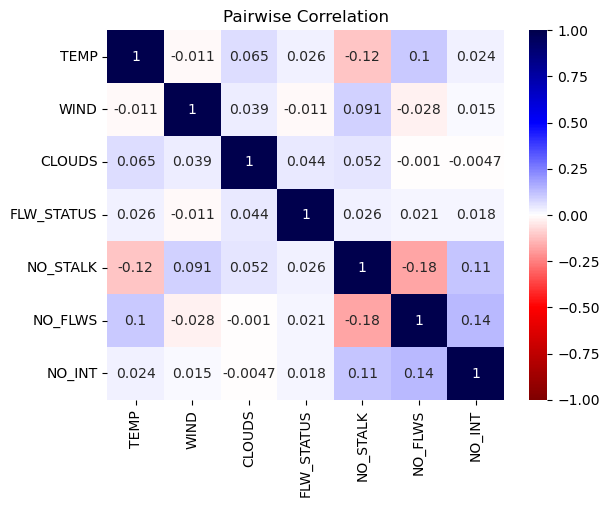

In [216]:
dff_corr = dff_encoded[['TEMP', 'WIND', 'CLOUDS', 'FLW_STATUS',  'NO_STALK', 'NO_FLWS', 'NO_INT']].corr()
sns.heatmap(data=dff_corr, annot=True, vmin=-1, vmax=1, cmap='seismic_r').set(title='Pairwise Correlation')
plt.show()

## 4) Data Modeling and Inferences

Please Add short description of process.